In [17]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [18]:
minist = tf.keras.datasets.mnist

In [19]:
(x_train,y_train),(x_test,y_test) = minist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')

model.fit(x_train,y_train, epochs=3)

model.save("HandWritten.model")

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4648 - accuracy: 0.8722
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1147 - accuracy: 0.9645
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0731 - accuracy: 0.9783
INFO:tensorflow:Assets written to: HandWritten.model\assets


In [22]:
model = tf.keras.models.load_model("HandWritten.model")

the number is 1


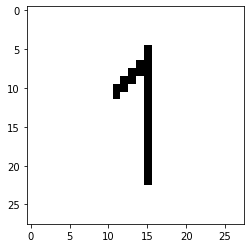

the number is 1


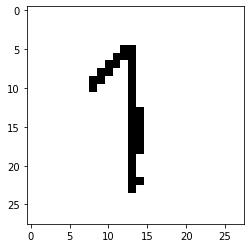

the number is 1


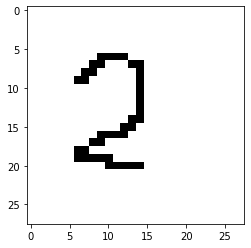

the number is 2


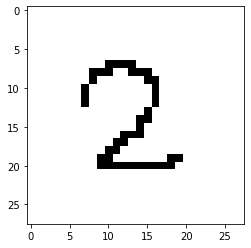

the number is 3


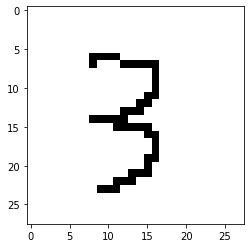

the number is 8


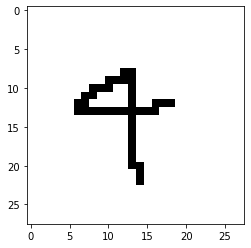

the number is 9


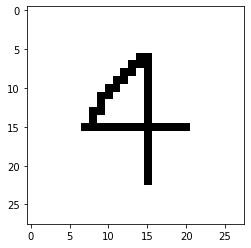

the number is 3


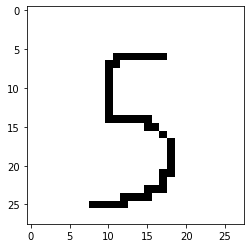

the number is 5


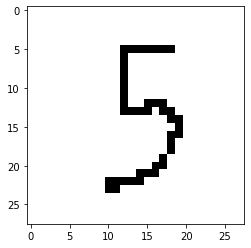

the number is 4


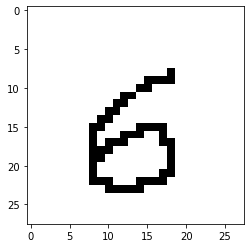

the number is 7


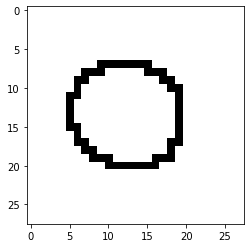

In [23]:
image = 1
while os.path.isfile(f"numbers/number{image}.png"):
    try:
        img = cv2.imread(f"numbers/number{image}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"the number is {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    finally:
        image += 1